In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
acc_data = np.loadtxt("Job-2_accelerations.dat")
acc_data.shape

(10001, 120)

In [3]:
# regard only acc-data in y-direction of mid-sensor

y_acc = np.zeros([acc_data.shape[0], 20])

column = 0
for i in range(3,120,6):

    y_acc[:,column] = acc_data[:,i]
    
    column +=1





In [4]:
mid_span1 = y_acc[:,4]

np.float64(-0.015448042984434444)

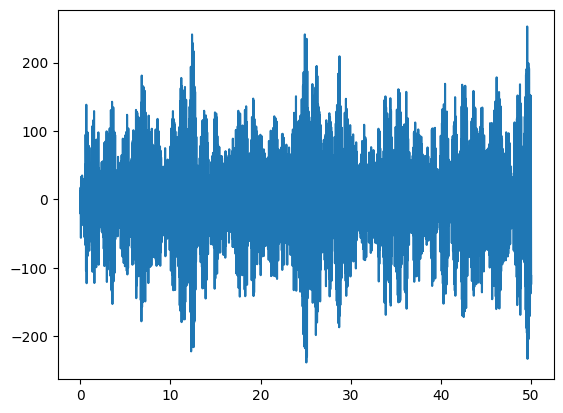

In [5]:
fs = 1/0.005

t = np.linspace(0,50,10001)

plt.plot(t,mid_span1)


mid_span1.mean()

In [11]:
import scipy as sp

%matplotlib qt

labels = ['Exp 2', 'Exp 40', 'Exp 59', 'Exp 78', 'Exp 97']

fig3, ax3 = plt.subplots(1,1, figsize=[18,10])

cur_data = mid_span1 - mid_span1.mean()

segment_length = np.floor(len(cur_data)/3) #-1 to neglect header

overlap = np.floor(segment_length*2/3)

optimized_length = np.ceil(np.log2(segment_length)).astype('int')

nff = max(2**optimized_length, 2048)

f_1, Pxx_den_1 = sp.signal.welch(cur_data, fs, window = 'hann', nperseg = segment_length, noverlap = overlap, nfft = nff, detrend = False)

ax3.semilogy(f_1, Pxx_den_1, linewidth=0.6)
ax3.set_xlabel('Frequency in [Hz]')
ax3.set_ylabel('Power/ Frequency [dB/Hz]')

t_vec = np.arange(0,len(cur_data)/2000,1/2000)


ax3.vlines(14.297, ymin=0, ymax=10000, linewidth = 0.4, label='EF 1: 14.297 Hz', colors='tab:blue')
ax3.vlines(15.074, ymin=0, ymax=10000, linewidth = 0.4, label='EF 2: 15.074 Hz', colors='tab:orange')
ax3.vlines(37.935, ymin=0, ymax=10000, linewidth = 0.4, label='EF 3: 37.935 Hz', colors='tab:green')
ax3.vlines(41.028, ymin=0, ymax=10000, linewidth = 0.4, label='EF 3: 41.028 Hz', colors='tab:red')

ax3.set_xlim([0,50])
ax3.set_title('Welchs Power Spectral Density Estimate')
ax3.legend()
